Online Retail is Transnational dataset which contains the transactions for UK based registered non- Store online retail. The main Objective is to find the number of segments that are  possibly available to target and also segmenting them accordingly.

### 1. Data Preparation:

#### 1.1 Importing Libraries:

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [179]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [180]:
pd.set_option("display.max_columns", 500)

#### 1.2 Importing Dataset:

In [181]:
df = pd.read_csv("Online+Retail.csv", encoding="unicode_escape")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [182]:
df.shape

(541909, 8)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### 1.3 Data Cleaning:

In [184]:
# missing values:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [185]:
((df.isnull().sum())/len(df)) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [186]:
# drop all rows having missing values:
df  = df.dropna()

In [187]:
((df.isnull().sum())/len(df)) * 100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

#### 1.4 Preparation of RFM attributes:

- RFM Analysis:
- R - Recency (no of days since last purchase)
- F - Frequency (no of transactions)
- M - Monetary Value (Total amountof transactions) - Revenue contributed

In [188]:
# cols = cust id, recency, frequency, Monetary value

In [189]:
# new column : amount
df["Amount"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [190]:
# monetary value:
df_Amount=df.groupby("CustomerID")["Amount"].sum()
df_Amount = df_Amount.reset_index()
df_Amount.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [191]:
# frequency:
df_frequency = df.groupby("CustomerID")["InvoiceNo"].count()
df_frequency = df_frequency.reset_index()
df_frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [192]:
df_frequency.columns = ["CustomerID", "Frequency"]

In [193]:
df_frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [194]:
# merging the Dataframes:
df_group = pd.merge(df_Amount,df_frequency,on="CustomerID",how="inner")
df_group.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [195]:
# recency:
# convert to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format ="%d-%m-%Y %H:%M")

In [196]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [198]:
#compute max date:
max_date = max(df["InvoiceDate"])
max_date

Timestamp('2011-12-09 12:50:00')

In [199]:
# compute the difference between max date and invoice date:
df["Diff"] = max_date - df["InvoiceDate"]

In [200]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [201]:
# creating recency column:
last_purchase = df.groupby("CustomerID")["Diff"].min()
last_purchase.head()

CustomerID
12346.0   325 days 02:33:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
Name: Diff, dtype: timedelta64[ns]

In [202]:
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [203]:
# merging the dataframes:
df_group = pd.merge(df_group, last_purchase, on = "CustomerID", how = "inner")
df_group.head()

,CustomerID,Amount,Frequency,Diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [204]:
df_group.columns = ["CustomerID", "Amount", "Frequency", "Recency"]

In [205]:
df_group.head(10)

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00
5,12352.0,1545.41,95,35 days 22:13:00
6,12353.0,89.00,4,203 days 19:03:00
7,12354.0,1079.40,58,231 days 23:39:00
8,12355.0,459.40,13,213 days 23:01:00
9,12356.0,2811.43,59,22 days 04:10:00


In [206]:
import datetime as dt

In [207]:
# number of days required:
df_group["Recency"] = df_group["Recency"].dt.days
df_group["Recency"].head()

0    325
1      1
2     74
3     18
4    309
Name: Recency, dtype: int64

#### 1.5 Outlier Treatment:

<AxesSubplot:xlabel='Amount'>

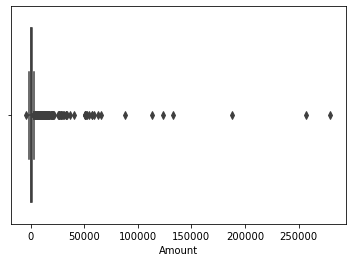

In [208]:
sns.boxplot(df_group["Amount"])

<AxesSubplot:xlabel='Frequency'>

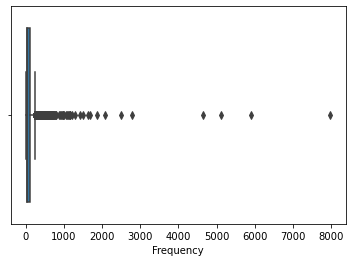

In [209]:
sns.boxplot(df_group["Frequency"])

<AxesSubplot:xlabel='Recency'>

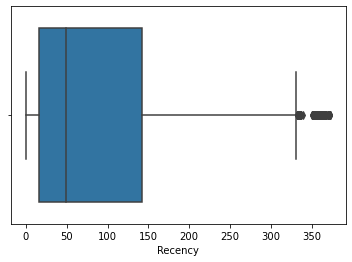

In [210]:
sns.boxplot(df_group["Recency"])

In [211]:
# removing Statistical outliers:
q1 = df_group.Amount.quantile(0.05)
q3 = df_group.Amount.quantile(0.95)
IQR = q3 - q1
df_group = df_group[(df_group.Amount >=q1 - 1.5* IQR )&(df_group.Amount<=q3+1.5*IQR)]

q1 = df_group.Recency.quantile(0.05)
q3 = df_group.Recency.quantile(0.95)
IQR = q3 - q1
df_group = df_group[(df_group.Recency >=q1 - 1.5* IQR )&(df_group.Recency<=q3+1.5*IQR)]

q1 = df_group.Frequency.quantile(0.05)
q3 = df_group.Frequency.quantile(0.95)
IQR = q3 - q1
df_group = df_group[(df_group.Frequency >=q1 - 1.5* IQR )&(df_group.Frequency<=q3+1.5*IQR)]

#### 1.6 Rescaling

In [212]:
df_rfm = df_group[["Amount", "Frequency", "Recency"]]
df_rfm

,Amount,Frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
...,...,...,...
4366,173.90,9,73
4367,180.60,10,277
4368,80.82,7,180
4369,176.60,13,7


In [213]:
# standard Scaling:
#instantiate:
scaler = StandardScaler()
#fit_transform:
df_rfm_scaled = scaler.fit_transform(df_rfm)
df_rfm_scaled.shape

(4293, 3)

In [214]:
df_rfm_scaled = pd.DataFrame(df_rfm_scaled)
df_rfm_scaled.columns = ["Amount", "Frequency", "Recency"]
df_rfm_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


#### 1.7 Hopkins Statistics:

In [215]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

### 2. Modelling:

In [216]:
# Kmeans with some arbitrary k
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(df_rfm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [217]:
len(kmeans.labels_)

4293

In [218]:
kmeans.labels_

array([3, 2, 0, ..., 3, 0, 0])

In [219]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

#### 2.1 Optimal Number of Clusters:

[7661.701161911683, 4433.580619302108, 3360.5792494829157, 2803.031422302392, 2392.1289145429055, 2038.8696785984089, 1826.0408305885308]


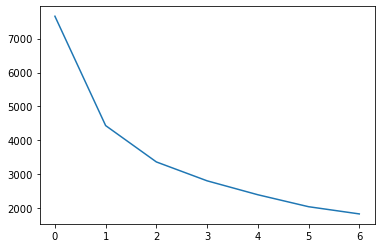

In [220]:
# Elbow Curve / SSD:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num in range_n_clusters:
    kmeans = KMeans(n_clusters=num,max_iter=50)
    kmeans.fit(df_rfm_scaled)
    ssd.append(kmeans.inertia_)
print(ssd)

# plot SSD:
plt.plot(ssd)

    
    

In [221]:
# Silhouette Analysis: Measures the goodness of clusters choosen.
# Silhouette Score = p-q/(max(p,q))
# p is mean distance to the points in the nearest cluster that the data point is not a part of
# q is mean intra cluster distance to all the points in its own cluster

range = [2,3,4,5,6,7,8]

for n in range:
    kmeans = KMeans(n_clusters=n,max_iter=50)
    kmeans.fit(df_rfm_scaled)
    cluster_lables = kmeans.labels_
    silhouette_avg = silhouette_score(df_rfm_scaled,cluster_lables)
    print("For n_clusters = {0}, the silhouette score is = {1}".format(n,silhouette_avg))

For n_clusters = 2, the silhouette score is = 0.5415858652525395
For n_clusters = 3, the silhouette score is = 0.5084896296141937
For n_clusters = 4, the silhouette score is = 0.4777820100216849
For n_clusters = 5, the silhouette score is = 0.46627005641897035
For n_clusters = 6, the silhouette score is = 0.41742250872395564
For n_clusters = 7, the silhouette score is = 0.4181795595993172
For n_clusters = 8, the silhouette score is = 0.40783973901956305


In [222]:
# taking k as  3
kmeans = KMeans(n_clusters=3,max_iter=50)
kmeans.fit(df_rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [223]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [224]:
# Assign customerID to each label:
df_group.head()
df_group["ClusterID"] = kmeans.labels_
df_group.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


<AxesSubplot:xlabel='ClusterID', ylabel='Amount'>

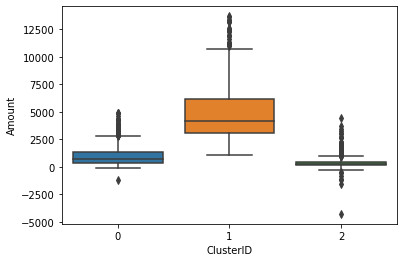

In [225]:
#plot:
sns.boxplot(x="ClusterID", y="Amount", data=df_group)

<AxesSubplot:xlabel='ClusterID', ylabel='Recency'>

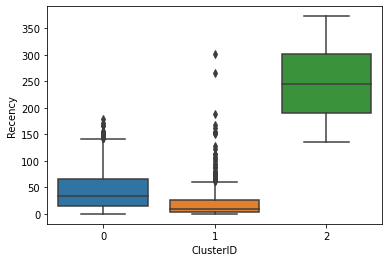

In [226]:
#plot:
sns.boxplot(x="ClusterID", y="Recency", data=df_group)

<AxesSubplot:xlabel='ClusterID', ylabel='Frequency'>

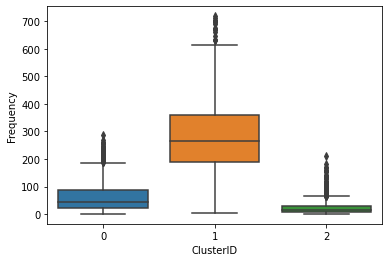

In [227]:
#plot:
sns.boxplot(x="ClusterID", y="Frequency", data=df_group)

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

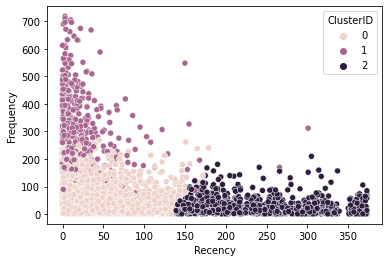

In [228]:
sns.scatterplot(y="Frequency", x ="Recency", data=df_group, hue="ClusterID")

<AxesSubplot:xlabel='Recency', ylabel='Amount'>

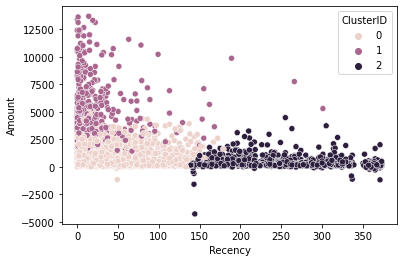

In [229]:
sns.scatterplot(y="Amount", x ="Recency", data=df_group, hue="ClusterID")

<AxesSubplot:xlabel='Frequency', ylabel='Amount'>

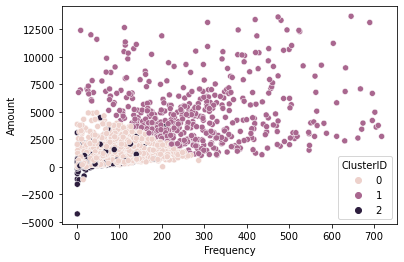

In [230]:
sns.scatterplot(y="Amount", x ="Frequency", data=df_group, hue="ClusterID")

#### Conclusion:

Customers segmented under ClusterID 1, are having Better recent interaction, Spending power i.e, Monetary Value and also having higher frequency interms of number of orders followed by ClusterID 2 and ClusterID 0.